In [1]:
# EDA MOdule importing
import shutil

shutil.copy('/content/drive/MyDrive/DA_Library/EDA.py','EDA.py')

'EDA.py'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import EDA as eda

In [3]:
raw_data = eda.readfile('/content/drive/MyDrive/Ajinkya_Patil_Plant Disease Detection /Processed_data&models/Apple/dataset_apple.xlsx')

In [4]:
raw_data.dtypes

Unnamed: 0      int64
area          float64
perimeter     float64
red_mean      float64
green_mean    float64
blue_mean     float64
f1            float64
f2            float64
red_std       float64
green_std     float64
blue_std      float64
f4            float64
f5            float64
f6            float64
f7            float64
f8            float64
label           int64
dtype: object

In [5]:
raw_data.drop(['Unnamed: 0'],axis = 1, inplace=True)

In [6]:
raw_data.columns

Index(['area', 'perimeter', 'red_mean', 'green_mean', 'blue_mean', 'f1', 'f2',
       'red_std', 'green_std', 'blue_std', 'f4', 'f5', 'f6', 'f7', 'f8',
       'label'],
      dtype='object')

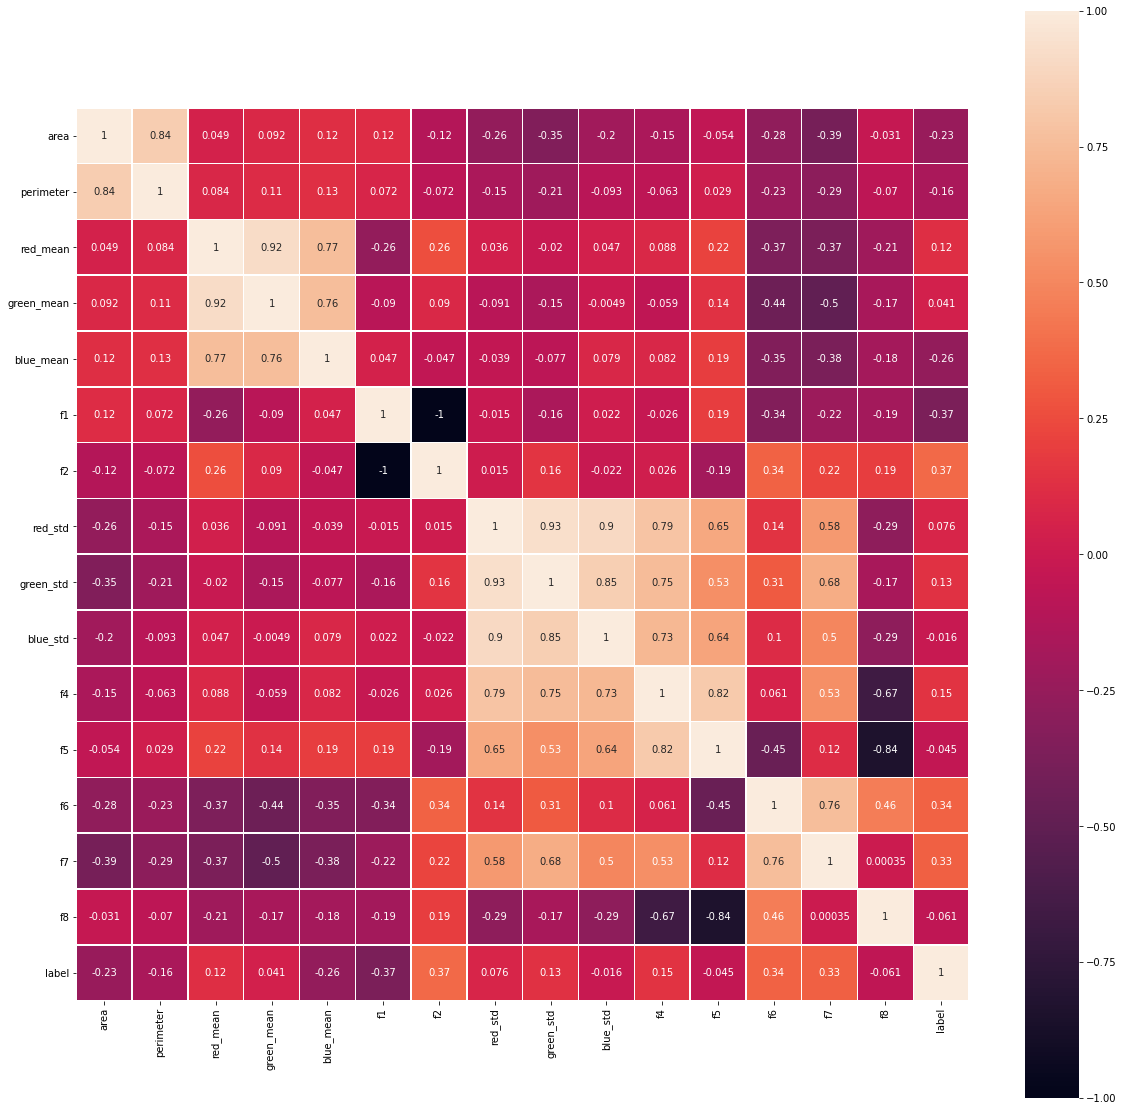

In [7]:
eda.correlation(raw_data)

In [8]:
eda.correlationlist(raw_data)

area
The Pearson Correlation Coefficient is -0.23494824682290105  with a P-value of P = 1.1568249510500957e-97
True
------------------------------------------------------------------------------------------
perimeter
The Pearson Correlation Coefficient is -0.15893465715621716  with a P-value of P = 5.1800907540829825e-45
True
------------------------------------------------------------------------------------------
red_mean
The Pearson Correlation Coefficient is 0.12020658068688009  with a P-value of P = 2.4469918851912875e-26
True
------------------------------------------------------------------------------------------
green_mean
The Pearson Correlation Coefficient is 0.04073629453124482  with a P-value of P = 0.0003346822225983645
True
------------------------------------------------------------------------------------------
blue_mean
The Pearson Correlation Coefficient is -0.25901285870123125  with a P-value of P = 5.269205320308383e-119
True
---------------------------------------

**Insights:**
Less correlated features are:
- green channel mean
- red channel std
- blue channel std
- f5
- f8

Also f1 and f2 are mutually relative So one of them can be removed

In [12]:
cleaned_data = raw_data.drop(['green_mean', 'red_std', 'blue_std', 'f5', 'f8','f1'],axis = 1, inplace=False)

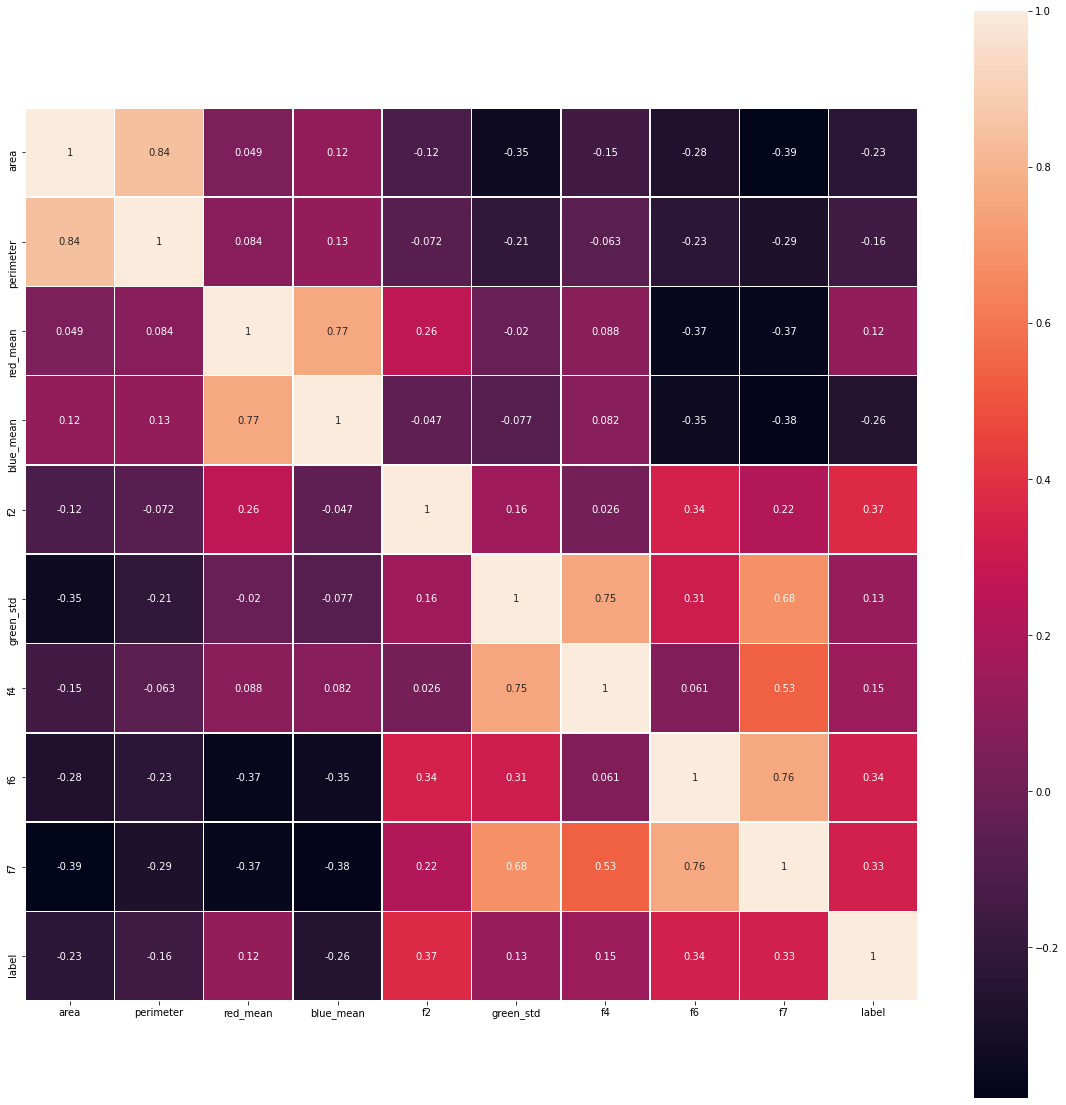

In [13]:
eda.correlation(cleaned_data)

In [14]:
cleaned_data = eda.removenullrows(cleaned_data)

In [15]:
raw_data.shape

(7749, 16)

In [16]:
cleaned_data.shape

(7749, 10)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold 


In [20]:
df = cleaned_data.reset_index()

In [24]:
X = df.drop(['index','label'],axis = 1, inplace=False)
y = df['label']
print(X.shape)
print(y.shape)

(7749, 9)
(7749,)


In [25]:
k = 5
kf = KFold(n_splits=k, random_state=9, shuffle = True)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state = 50,n_estimators = 50,max_samples = 0.7)
 
acc_score = []

for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
    model = RandomForestClassifier(random_state = 50,n_estimators = 50,max_samples = 0.7)
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)            # classification
    acc = accuracy_score(pred_values , y_test)     # Classification

    #acc = model.score(X_test,y_test)                # Regression
    
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('Score of each fold - {}'.format(acc_score))
print('Avg Score : {}'.format(avg_acc_score))

Score of each fold - [0.9025806451612903, 0.915483870967742, 0.9180645161290323, 0.912258064516129, 0.907036797934151]
Avg Score : 0.911084778941669


# **K- fold Cross validation accuracy:**
# **0.911084778941669**

# ROC Curve

In [28]:
!pip install scikit-plot

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


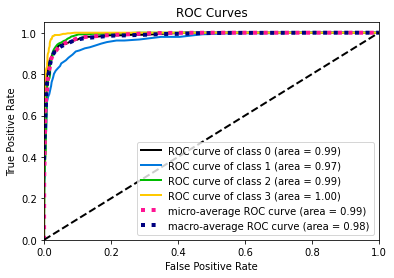

In [29]:
import scikitplot as skplt
import matplotlib.pyplot as plt

y_true = y_test
y_probas = model.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_true, y_probas)


filename = '/content/drive/MyDrive/CV_HA/Classification model/V1/ROC_v1.png'

plt.savefig(filename)
plt.show()

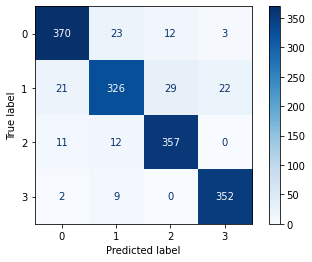

In [31]:
from sklearn.metrics import plot_confusion_matrix
y_pred = model.predict(X_test)
plot_confusion_matrix(model, X_test, y_test, values_format = 'd',cmap = 'Blues',display_labels = ['0','1','2','3'])

In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, [0,1,2,3]))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       408
           1       0.88      0.82      0.85       398
           2       0.90      0.94      0.92       380
           3       0.93      0.97      0.95       363

    accuracy                           0.91      1549
   macro avg       0.91      0.91      0.91      1549
weighted avg       0.91      0.91      0.91      1549



# **F1 Score:**
# **0.91**

# Deployment

In [34]:
from sklearn.ensemble import RandomForestClassifier
lm = RandomForestClassifier(random_state = 50,n_estimators = 50,max_samples = 0.7)
lm.fit(X,y)
print('Training Score: ',lm.score(X,y))

Training Score:  0.9979352174474125


In [35]:
lm.feature_importances_

array([0.0569996 , 0.0542168 , 0.10490984, 0.09395711, 0.19890627,
       0.08926768, 0.16472827, 0.12115528, 0.11585916])

In [36]:
import pickle
filename = '/content/drive/MyDrive/Ajinkya_Patil_Plant Disease Detection /Processed_data&models/Apple/Results/Applemodel_V1.sav'
pickle.dump(lm, open(filename, 'wb'))

In [37]:
filename = '/content/drive/MyDrive/Ajinkya_Patil_Plant Disease Detection /Processed_data&models/Apple/Results/Applemodel_V1.sav'

dep_model = pickle.load(open(filename, 'rb'))

print(dep_model.score(X,y))

0.9979352174474125


# Selected Features

In [38]:
X.columns

Index(['area', 'perimeter', 'red_mean', 'blue_mean', 'f2', 'green_std', 'f4',
       'f6', 'f7'],
      dtype='object')

# Label Dictionary

- 0 :Apple___healthy
- 1: Apple___Apple_scab
- 2: Apple___Black_rot
- 3: Apple___Cedar_apple_rust

# Performance
- Accuracy : 0.9110
- F1 score : 0.91